In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import json
thailand_geojson_path = "../../data/thailand-provinces.geojson"


In [3]:

with open(thailand_geojson_path, 'r') as read_json:
    data = json.load(read_json)


In [4]:
import pandas as pd

In [10]:
data = pd.read_json(thailand_geojson_path)


,type,features
0,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
1,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
2,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
3,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
4,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
...,...,...
73,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
74,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
75,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."
76,FeatureCollection,"{'properties': {'NAME_0': 'Thailand', 'NAME_1'..."


In [5]:
import geojson


In [179]:
with open(thailand_geojson_path, 'r') as file:
    geojson_data = geojson.load(file)

In [180]:
print(type(geojson_data))

<class 'geojson.feature.FeatureCollection'>


In [181]:
from copy import deepcopy

new_geojson_data = deepcopy(geojson_data)

In [182]:
import numpy as np
index = 0
for province_feature in new_geojson_data['features']:
    geometry = province_feature["geometry"]
    print(province_feature["properties"]["NAME_1"], index)
    if len(geometry["coordinates"]) == 1:
        geometry["coordinates"] = np.round(geometry["coordinates"], decimals=6).tolist()
    elif len(geometry["coordinates"]) > 1:
        all_polygons = []
        for i_polygon in geometry["coordinates"]:
            all_polygons.append(np.round(i_polygon, decimals=6).tolist())
        geometry["coordinates"] == all_polygons
    else:
        raise Exception(f"Unknown geometry format: {len(geometry['coordinates'])}")
    index+=1
    
rounded_output_path = "../../data/rounded-thailand-provinces.geojson"
with open(rounded_output_path, 'w') as file:
    geojson.dump(new_geojson_data, file)

Amnat Charoen 0
Ang Thong 1
Bangkok Metropolis 2
Buri Ram 3
Chachoengsao 4
Chai Nat 5
Chaiyaphum 6
Chanthaburi 7
Chiang Mai 8
Chiang Rai 9
Chon Buri 10
Chumphon 11
Kalasin 12
Kamphaeng Phet 13
Kanchanaburi 14
Khon Kaen 15
Krabi 16
Lampang 17
Lamphun 18
Loei 19
Lop Buri 20
Mae Hong Son 21
Maha Sarakham 22
Mukdahan 23
Nakhon Nayok 24
Nakhon Pathom 25
Nakhon Phanom 26
Nakhon Ratchasima 27
Nakhon Sawan 28
Nakhon Si Thammarat 29
Nan 30
Narathiwat 31
Nong Bua Lam Phu 32
Nong Khai 33
Nonthaburi 34
Pathum Thani 35
Pattani 36
Phangnga 37
Phatthalung (Songkhla Lake) 38
Phatthalung 39
Phayao 40
Phetchabun 41
Phetchaburi 42
Phichit 43
Phitsanulok 44
Phra Nakhon Si Ayutthaya 45
Phrae 46
Phuket 47
Prachin Buri 48
Prachuap Khiri Khan 49
Ranong 50
Ratchaburi 51
Rayong 52
Roi Et 53
Sa Kaeo 54
Sakon Nakhon 55
Samut Prakan 56
Samut Sakhon 57
Samut Songkhram 58
Saraburi 59
Satun 60
Si Sa Ket 61
Sing Buri 62
Songkhla (Songkhla Lake) 63
Songkhla 64
Sukhothai 65
Suphan Buri 66
Surat Thani 67
Surin 68
Tak 69


In [183]:
print(geojson_data["features"][0]["geometry"]["coordinates"])



[[[104.972618, 16.275358], [104.9729, 16.27532], [104.973183, 16.27532], [104.973473, 16.27533], [104.97374, 16.275358], [104.974022, 16.275381], [104.974297, 16.27541], [104.974579, 16.27545], [104.974846, 16.27549], [104.975136, 16.275539], [104.97541, 16.275579], [104.975693, 16.27564], [104.975967, 16.27569], [104.976242, 16.275751], [104.976517, 16.27581], [104.976776, 16.275881], [104.977051, 16.275961], [104.977318, 16.276041], [104.977592, 16.27614], [104.977852, 16.27623], [104.978111, 16.27632], [104.978378, 16.276421], [104.978638, 16.27651], [104.978912, 16.2766], [104.979156, 16.276711], [104.979416, 16.27681], [104.979698, 16.27693], [104.979942, 16.277071], [104.980186, 16.277201], [104.980431, 16.27734], [104.980659, 16.27747], [104.980972, 16.27747], [104.981216, 16.277571], [104.981552, 16.27771], [104.981796, 16.277571], [104.982033, 16.27743], [104.982269, 16.277271], [104.982498, 16.277121], [104.982727, 16.27696], [104.982857, 16.276855], [104.982941, 16.276791], 

In [187]:
# Skipping

In [189]:
from copy import deepcopy

skipped_1 = deepcopy(new_geojson_data)
index = 0
for province_feature in skipped_1['features']:
    geometry = province_feature["geometry"]
    print(province_feature["properties"]["NAME_1"], index)
    if len(geometry["coordinates"]) == 1:
        t = []
        for i in range(0, len(geometry["coordinates"][0])-1, 2):
            t.append(geometry["coordinates"][0][i])
        t.append(geometry["coordinates"][0][-1])
        geometry["coordinates"] = [t]
    elif len(geometry["coordinates"]) > 1:
        if geometry["type"].lower == "multipolygon":
            all_polygons = []
            for i_polygon in geometry["coordinates"]:
                t = []
                for i in range(0, len(i_polygon[0])-1, 2):
                    t.append(i_polygon[0][i])
                t.append(i_polygon[0][-1])
                all_polygons.append(t)
            geometry["coordinates"] = all_polygons
    else:
        raise Exception(f"Unknown geometry format: {len(geometry['coordinates'])}")
    index+=1
    
skip_1_output_path = "../../data/skip-1-rounded-thailand-provinces.geojson"
with open(skip_1_output_path, 'w') as file:
    geojson.dump(skipped_1, file)

Amnat Charoen 0
Ang Thong 1
Bangkok Metropolis 2
Buri Ram 3
Chachoengsao 4
Chai Nat 5
Chaiyaphum 6
Chanthaburi 7
Chiang Mai 8
Chiang Rai 9
Chon Buri 10
Chumphon 11
Kalasin 12
Kamphaeng Phet 13
Kanchanaburi 14
Khon Kaen 15
Krabi 16
Lampang 17
Lamphun 18
Loei 19
Lop Buri 20
Mae Hong Son 21
Maha Sarakham 22
Mukdahan 23
Nakhon Nayok 24
Nakhon Pathom 25
Nakhon Phanom 26
Nakhon Ratchasima 27
Nakhon Sawan 28
Nakhon Si Thammarat 29
Nan 30
Narathiwat 31
Nong Bua Lam Phu 32
Nong Khai 33
Nonthaburi 34
Pathum Thani 35
Pattani 36
Phangnga 37
Phatthalung (Songkhla Lake) 38
Phatthalung 39
Phayao 40
Phetchabun 41
Phetchaburi 42
Phichit 43
Phitsanulok 44
Phra Nakhon Si Ayutthaya 45
Phrae 46
Phuket 47
Prachin Buri 48
Prachuap Khiri Khan 49
Ranong 50
Ratchaburi 51
Rayong 52
Roi Et 53
Sa Kaeo 54
Sakon Nakhon 55
Samut Prakan 56
Samut Sakhon 57
Samut Songkhram 58
Saraburi 59
Satun 60
Si Sa Ket 61
Sing Buri 62
Songkhla (Songkhla Lake) 63
Songkhla 64
Sukhothai 65
Suphan Buri 66
Surat Thani 67
Surin 68
Tak 69


In [190]:
import numpy as np
index = 0
skipped_2 = deepcopy(new_geojson_data)

for province_feature in skipped_2['features']:
    geometry = province_feature["geometry"]
    print(province_feature["properties"]["NAME_1"], index)
    if len(geometry["coordinates"]) == 1:
        t = []
        for i in range(0, len(geometry["coordinates"][0])-2, 3):
            t.append(geometry["coordinates"][0][i])
        t.append(geometry["coordinates"][0][-1])
        geometry["coordinates"] = [t]
    elif len(geometry["coordinates"]) > 1:
        if geometry["type"].lower == "multipolygon":
            all_polygons = []
            for i_polygon in geometry["coordinates"]:
                t = []
                for i in range(0, len(i_polygon[0])-2, 3):
                    t.append(i_polygon[0][i])
                t.append(i_polygon[0][-1])
                all_polygons.append(t)
            geometry["coordinates"] = all_polygons
    else:
        raise Exception(f"Unknown geometry format: {len(geometry['coordinates'])}")
    index+=1
    
skip_2_output_path = "../../data/skip-2-rounded-thailand-provinces.geojson"
with open(skip_2_output_path, 'w') as file:
    geojson.dump(skipped_2, file)

Amnat Charoen 0
Ang Thong 1
Bangkok Metropolis 2
Buri Ram 3
Chachoengsao 4
Chai Nat 5
Chaiyaphum 6
Chanthaburi 7
Chiang Mai 8
Chiang Rai 9
Chon Buri 10
Chumphon 11
Kalasin 12
Kamphaeng Phet 13
Kanchanaburi 14
Khon Kaen 15
Krabi 16
Lampang 17
Lamphun 18
Loei 19
Lop Buri 20
Mae Hong Son 21
Maha Sarakham 22
Mukdahan 23
Nakhon Nayok 24
Nakhon Pathom 25
Nakhon Phanom 26
Nakhon Ratchasima 27
Nakhon Sawan 28
Nakhon Si Thammarat 29
Nan 30
Narathiwat 31
Nong Bua Lam Phu 32
Nong Khai 33
Nonthaburi 34
Pathum Thani 35
Pattani 36
Phangnga 37
Phatthalung (Songkhla Lake) 38
Phatthalung 39
Phayao 40
Phetchabun 41
Phetchaburi 42
Phichit 43
Phitsanulok 44
Phra Nakhon Si Ayutthaya 45
Phrae 46
Phuket 47
Prachin Buri 48
Prachuap Khiri Khan 49
Ranong 50
Ratchaburi 51
Rayong 52
Roi Et 53
Sa Kaeo 54
Sakon Nakhon 55
Samut Prakan 56
Samut Sakhon 57
Samut Songkhram 58
Saraburi 59
Satun 60
Si Sa Ket 61
Sing Buri 62
Songkhla (Songkhla Lake) 63
Songkhla 64
Sukhothai 65
Suphan Buri 66
Surat Thani 67
Surin 68
Tak 69


In [191]:
print(len(geojson_data["features"][0]["geometry"]["coordinates"][0]))
print(len(new_geojson_data["features"][0]["geometry"]["coordinates"][0]))
print(len(skipped_1["features"][0]["geometry"]["coordinates"][0]))
print(len(skipped_2["features"][0]["geometry"]["coordinates"][0]))



10821
10821
5411
3608


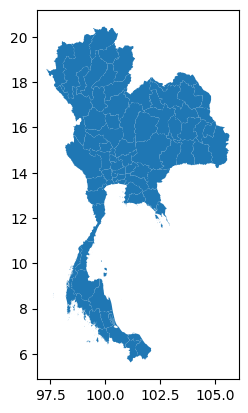

In [192]:
import geopandas as gpd
geo_df = gpd.read_file(thailand_geojson_path)
ax = geo_df.plot()
ax.figure.savefig('../../data/original.pdf')

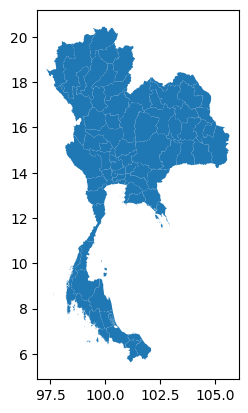

In [193]:
geo_df = gpd.read_file(rounded_output_path)
ax = geo_df.plot()
ax.figure.savefig('../../data/rounded.pdf')

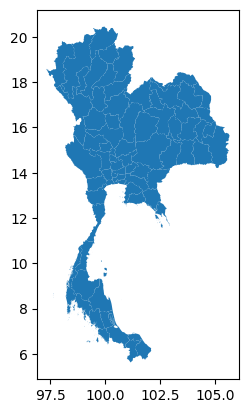

In [196]:
geo_df = gpd.read_file(skip_1_output_path)
ax = geo_df.plot()
ax.figure.savefig('../../data/skip_1.pdf')

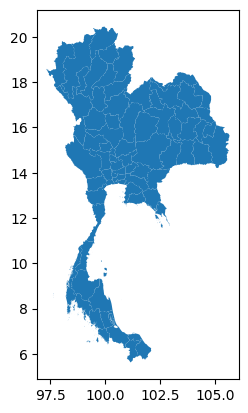

In [195]:
geo_df = gpd.read_file(skip_2_output_path)
ax = geo_df.plot()
ax.figure.savefig('../../data/skip_2.pdf')

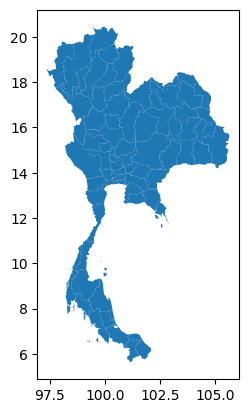

In [197]:
update_thailand = "../../data/update_thailand.json"
geo_df = gpd.read_file(update_thailand)
ax = geo_df.plot()
ax.figure.savefig('../../data/updated_original.pdf')